
<div class="jumbotron">
  <h1 class="display-4">Exploratory Data Analysis and Visualization Using Python</h1>
  <p><b>Dataset</b>: Listings of movies and tv shows on Netflix - Kaggle</p>
  <p><b>About Dataset</b>: This dataset consists of movies and tv shows available on Netflix as of 2021. The dataset is collected from Flixable
</div>

## I. Import libraries and Load the data

In [91]:
from IPython.display import clear_output
!pip install wordcloud
clear_output(wait=False)

In [92]:
!pip install pandas_profiling
clear_output(wait=False)

In [93]:
#pandas profiling for basic EDA
import pandas_profiling 
from pandas_profiling import ProfileReport 
#basic libraries for data analysis
import numpy as np 
import pandas as pd
from collections import Counter
#libraries for visualizing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [94]:
#Load the dataset
df = pd.read_csv("netflix_titles.csv")

## II. Overview Dataset by Pandas Profiling Report

In [95]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class="alert alert-info" role="alert">
  <h4 class="alert-heading">Notes after Overviewing</h4>
  <p>
        <b>type</b> - has 2 unique values: Movie, TV Show.<br>
        <b>country</b> - some have more than 1 country, split by comma.<br>
        <b>date_added</b> - needs to be formated dd-mm-yyyy.<br>
        <b>duration</b> - has 2 types: season(s) for TV Show and min(s) for Movie.<br>
        <b>listed_in</b> - some have more than 1 genre, split by comma.<br>
  <hr>
  <p class="mb-0">Now, let's find the null values</p>
</div>

In [96]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print("[{}] has [{}] missing values, the null rate is [{:.2f} %] ".format(i,
                                                                                     df[i].isnull().sum(),
                                                                                     null_rate))

[director] has [2634] missing values, the null rate is [29.91 %] 
[cast] has [825] missing values, the null rate is [9.37 %] 
[country] has [831] missing values, the null rate is [9.44 %] 
[date_added] has [10] missing values, the null rate is [0.11 %] 
[rating] has [4] missing values, the null rate is [0.05 %] 
[duration] has [3] missing values, the null rate is [0.03 %] 


<div class="alert alert-warning" role="alert">
  <h4 class="alert-heading">Handle missing data and complete dataset</h4>
  <p>
        <b>director</b> - Fill nan value with 'No Information'<br>
        <b>cast</b> - Fill nan value with 'No Information'<br>
        <b>country</b> - Replace missing values with the most frequent value<br>
        <b>date_added, rating, duration</b> - The null rate of these features are few (<=10 missing values) so I will drop rows that have null values.<br>
</div>

In [97]:
df['director'] = df['director'].fillna('No Information')
df['cast'] = df['cast'].fillna('No Information')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.dropna(inplace=True)

In [98]:
#format date-added
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [99]:
#split dataset by type
df_tv = df[df["type"] == "TV Show"]
df_mv = df[df["type"] == "Movie"]

## III. Using Data Visualization to Find Insights in Data

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">1. Distribution of Movie and TV Show</h4>
  <p>
      <b>Datasets - </b><mark>df</mark> <br>
        <b>Features - </b><mark>type</mark><br>
        <b>Chart type - </b><mark>Pie Chart</mark><br> 
    </p>
</div>

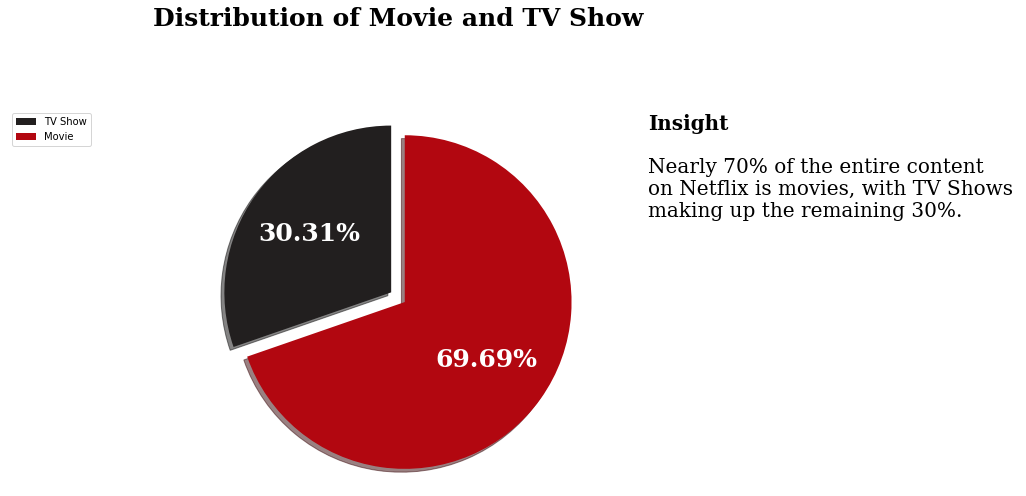

In [100]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),
        labels=labels,
        explode=[0.05,0.05],
        autopct='%1.2f%%',
        colors=['#221f1f','#b20710'],
        textprops={'color':"w",'fontsize': 25, 'fontweight':'bold','fontfamily':'serif'},
        startangle=90,
        shadow=True)
plt.title('Distribution of Movie and TV Show',fontfamily='serif', fontsize=25,fontweight='bold',y=1.2)
plt.legend(loc=2)
plt.axis('equal')
plt.text(1.5, 1, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')

plt.text(1.5, 0.35, '''
Nearly 70% of the entire content 
on Netflix is movies, with TV Shows 
making up the remaining 30%.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

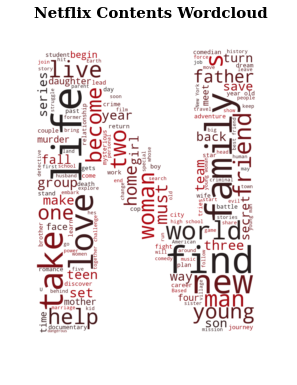

In [101]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib
def wordcloud_visualize(data):
    # Custom colour map based on Netflix palette
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
    text = str(list(data)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
    mask = np.array(Image.open('Netflix-logo.png'))
    wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.text(100, 0, 'Netflix Contents Wordcloud', fontsize=15, fontweight='bold', fontfamily='serif')
    plt.show()
wordcloud_visualize(df['description'])

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">2. Which country has most contents on Netflix</h4>
  <p>
      <b>Datasets - </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features - </b><mark>type</mark><br>
        <b>Chart type - </b><mark>Stacked Bar Chart</mark><br> 
    </p>
</div>

In [102]:
content_movie = dict(Counter(','.join(df_mv['country']).replace(' ,',',').replace(', ',',').split(',')))
content_tv    = dict(Counter(','.join(df_tv['country']).replace(' ,',',').replace(', ',',').split(',')))
content       = dict(Counter(','.join(df['country']).replace(' ,',',').replace(', ',',').split(',')))
d_temp = [content,content_movie,content_tv]
df_content = pd.DataFrame(d_temp).replace(np.nan, 0).T
df_content.rename(columns = {0:'total',1:'movie',2:'tvshow'},inplace=True)
df_content = df_content.sort_values(by=['total'],ascending=False)[:10]
df_content

,total,movie,tvshow
United States,4510.0,3188.0,1322.0
India,1046.0,962.0,84.0
United Kingdom,805.0,534.0,271.0
Canada,445.0,319.0,126.0
France,393.0,303.0,90.0
Japan,316.0,119.0,197.0
Spain,232.0,171.0,61.0
South Korea,231.0,61.0,170.0
Germany,226.0,182.0,44.0
Mexico,169.0,111.0,58.0


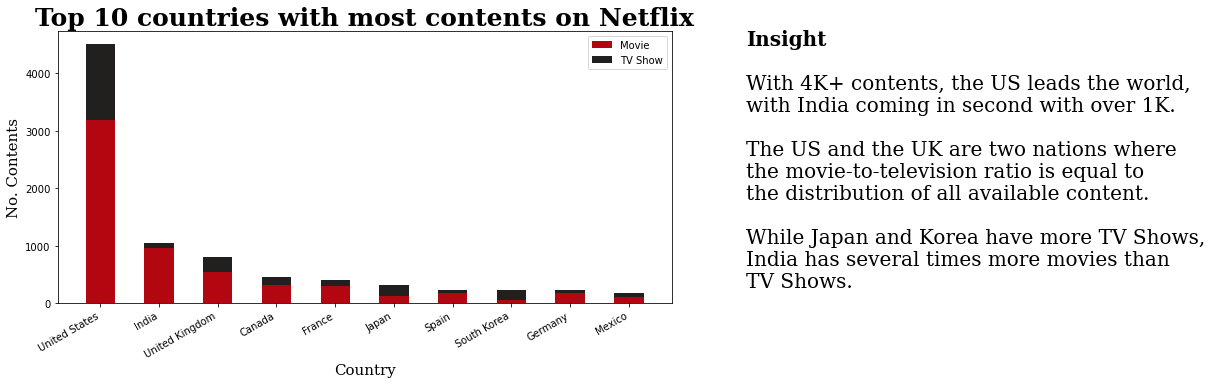

In [103]:
fig = plt.figure(figsize = (11, 5))
#data
x = df_content.index
y1 = df_content.movie
y2 = df_content.tvshow
# plot bars in stack manner
plt.bar(x, y1, color='#b20710',width = 0.5)
plt.bar(x, y2, bottom=y1, color='#221f1f',width = 0.5)

plt.legend(["Movie","TV Show"])

plt.xlabel("Country",fontfamily='serif',fontsize=15) 
plt.xticks(rotation=30, ha='right') #avoid text overlaping
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15)

plt.title("Top 10 countries with most contents on Netflix",fontfamily='serif', fontsize=25,fontweight='bold',y=1)
plt.text(11, 4500, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(11, -100, '''
With 4K+ contents, the US leads the world, 
with India coming in second with over 1K.

The US and the UK are two nations where 
the movie-to-television ratio is equal to 
the distribution of all available content.

While Japan and Korea have more TV Shows, 
India has several times more movies than 
TV Shows.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">3. How many contents have been added over the years</h4>
  <p>
      <b>Datasets - </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features - </b><mark>type</mark>,<mark>year_added</mark>,<mark>month_added</mark><br>
        <b>Chart type - </b><mark>Line Chart</mark><br> 
    </p>
</div>

In [104]:
mv_year = dict(Counter(df_mv['year_added']))
tv_year = dict(Counter(df_tv['year_added']))
d_temp_year = [mv_year,tv_year] 
df_year = pd.DataFrame(d_temp_year).replace(np.nan, 0).T
df_year.rename(columns = {0:'movie',1:'tvshow'},inplace=True)
df_year = df_year.sort_index()
df_year

,movie,tvshow
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,175.0
2017,836.0,349.0


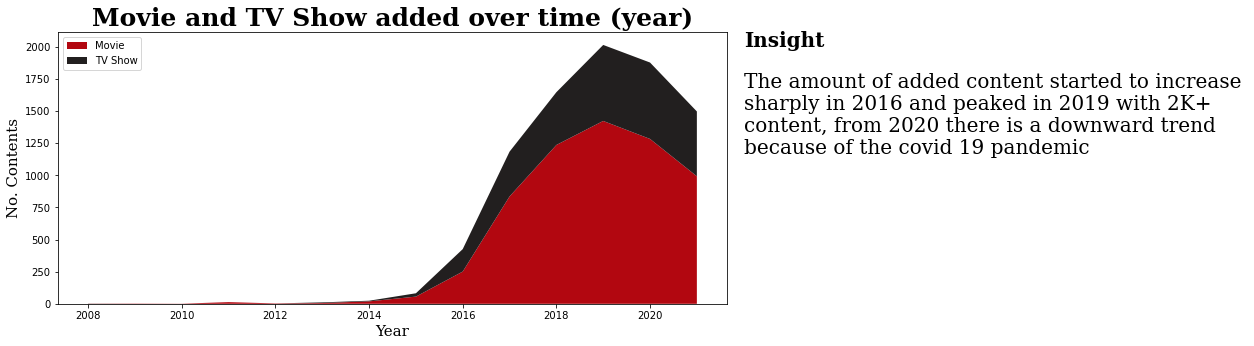

In [105]:
fig = plt.figure(figsize = (12, 5))
x = df_year.index
y1 = df_year.movie
y2 = df_year.tvshow

colors = ['#b20710','#221f1f']
label_name = ['Movie','TV Show']
plt.stackplot(x,y1, y2, labels= label_name, colors = colors)
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15) 
plt.xlabel("Year",fontfamily='serif',fontsize=15)

plt.title('Movie and TV Show added over time (year)',fontfamily='serif', fontsize=25,fontweight='bold',y=1)
plt.legend(["Movie","TV Show"])
plt.legend(loc=2)

#plt.axis('left')
plt.text(2022,2000, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(2022,1000, '''
The amount of added content started to increase 
sharply in 2016 and peaked in 2019 with 2K+ 
content, from 2020 there is a downward trend 
because of the covid 19 pandemic
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

In [106]:
mv_month = dict(Counter(df_mv['month_added']))
tv_moth = dict(Counter(df_tv['month_added']))
y = [mv_month,tv_moth] 
month_added = pd.DataFrame(y).replace(np.nan, 0).T
month_added.rename(columns = {0:'movie',1:'tvshow'},inplace=True)
month_added = month_added.sort_index()
month_added

,movie,tvshow
April,549,214
August,518,236
December,547,265
February,382,180
January,545,192
July,565,262
June,492,236
March,528,213
May,439,193
November,498,207


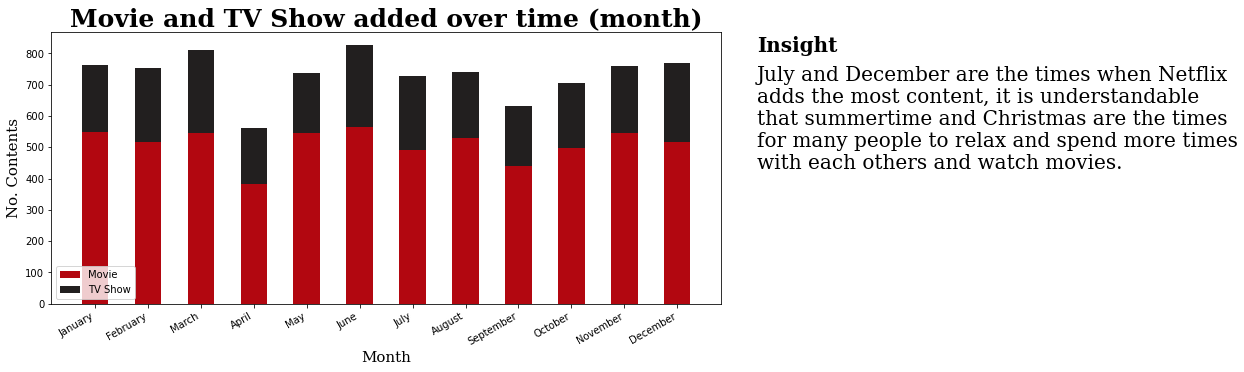

In [107]:
fig = plt.figure(figsize = (12, 5))
x = ['January','February','March','April','May','June','July','August','September','October','November','December']
y1 = month_added.movie
y2 = month_added.tvshow
colors = ['#b20710','#221f1f']
label_name = ['Movie','TV Show']
# plot bars in stack manner
plt.bar(x, y1, color='#b20710',width = 0.5)
plt.bar(x, y2, bottom=y1, color='#221f1f',width = 0.5)
#x,y label
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15) 
plt.xticks(rotation=30, ha='right') #avoid text overlaping
plt.xlabel("Month",fontfamily='serif',fontsize=15)
plt.title('Movie and TV Show added over time (month)',fontfamily='serif',fontweight='bold', fontsize=25,y=1)
plt.legend(["Movie","TV Show"],loc=3)

plt.text(12.5,805, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(12.5,360, '''
July and December are the times when Netflix 
adds the most content, it is understandable 
that summertime and Christmas are the times 
for many people to relax and spend more times
with each others and watch movies.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">4. Distribution of Rating in Movie/TV Show</h4>
  <p>
      <b>Datasets using- </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features using- </b><mark>type</mark>,<mark>rating</mark><br>
        <b>Chart type using - </b><mark>Bidirectional Bar Chart</mark><br> 
    </p>
</div>


In [108]:
movie_rating = dict(Counter(','.join(df_mv['rating']).replace(' ,',',').replace(', ',',').split(',')))
tv_rating = dict(Counter(','.join(df_tv['rating']).replace(' ,',',').replace(', ',',').split(',')))

In [109]:
rating = [movie_rating,tv_rating] 
df_rating = pd.DataFrame(rating).replace(np.nan, 0).T
df_rating.rename(columns = {0:'movie',1:'tvshow'},inplace=True)
df_rating['tvshow'] = df_rating['tvshow'].multiply(-1)
df_rating = df_rating.sort_values(by=['movie'],ascending=True)
df_rating

,movie,tvshow
NC-17,3.0,-0.0
UR,3.0,-0.0
TV-Y7-FV,5.0,-1.0
G,41.0,-0.0
NR,75.0,-4.0
TV-G,126.0,-94.0
TV-Y,131.0,-175.0
TV-Y7,139.0,-194.0
PG,287.0,-0.0
PG-13,490.0,-0.0


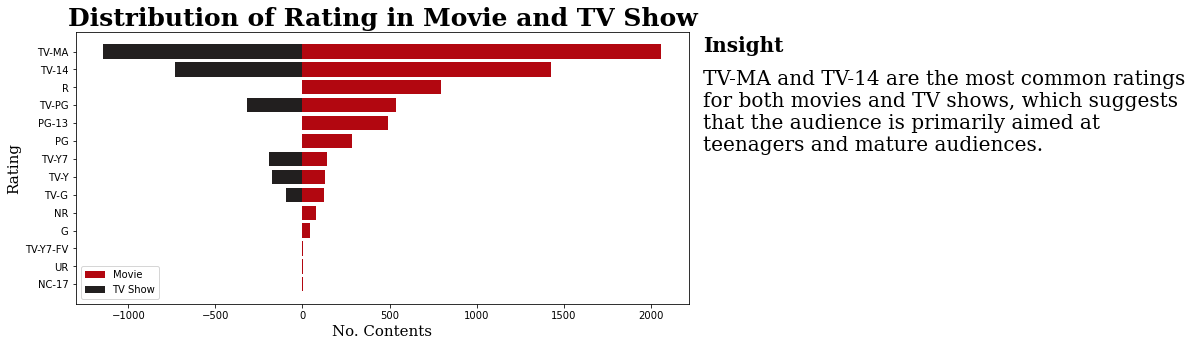

In [110]:
fig = plt.figure(figsize = (11, 5))
x   = df_rating.index
y1  = df_rating.movie
y2  = df_rating.tvshow
# plot bars in stack manner
plt.barh(x,y1, color='#b20710')
plt.barh(x,y2, color='#221f1f')

plt.legend(["Movie","TV Show"])

plt.ylabel("Rating",fontfamily='serif',fontsize=15) 
plt.xlabel("No. Contents",fontfamily='serif',fontsize=15)

plt.title("Distribution of Rating in Movie and TV Show",fontfamily='serif', fontsize=25,fontweight='bold',y=1)
plt.text(2300, 13, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(2300, 5, '''
TV-MA and TV-14 are the most common ratings 
for both movies and TV shows, which suggests 
that the audience is primarily aimed at 
teenagers and mature audiences.

'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">5. Genre correlation in Movie/TV Show</h4>
  <p>
      <b>Datasets using- </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features using- </b><mark>listed_in</mark><br>
        <b>Chart type using - </b><mark>Correlation Heatmap</mark><br> 
    </p>
</div>


In [111]:
df_temp_mv = df_mv[['show_id', 'listed_in']]
df_genre_mv = pd.concat([df_temp_mv.drop(columns=['listed_in']), 
                 df_temp_mv['listed_in'].str.get_dummies(sep=", ")], 
                axis=1)

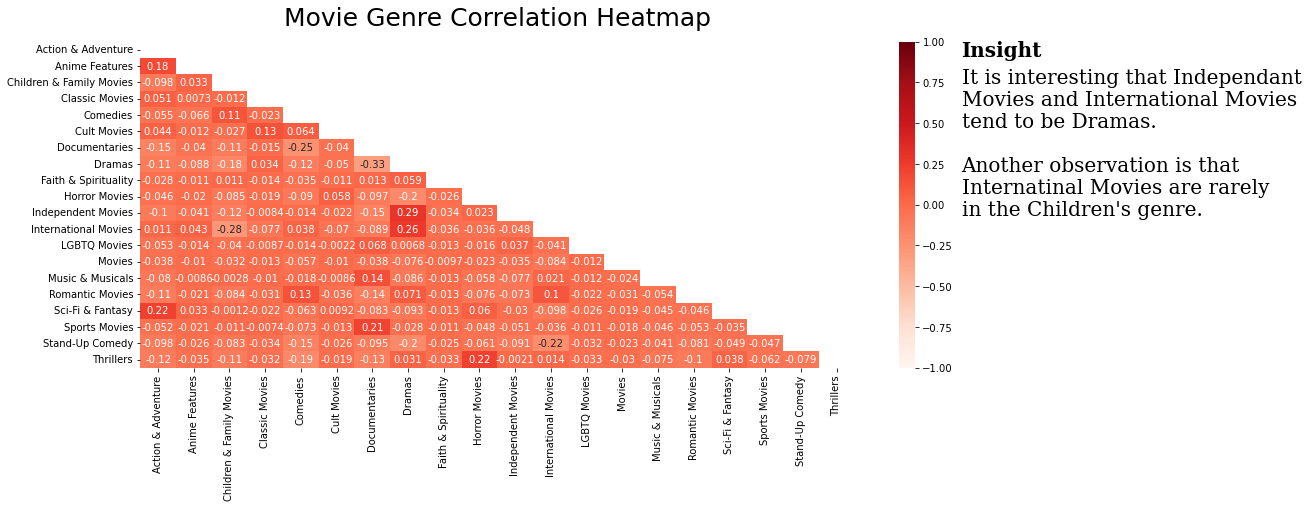

In [112]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_genre_mv.corr(), dtype=bool))
heatmap = sns.heatmap(df_genre_mv.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds')
heatmap.set_title('Movie Genre Correlation Heatmap', fontdict={'fontsize':25}, pad=16);
plt.text(23, 0.9, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(23, 12, '''
It is interesting that Independant 
Movies and International Movies
tend to be Dramas. 
             
Another observation is that 
Internatinal Movies are rarely
in the Children's genre.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

In [113]:
df_temp_tv = df_tv[['show_id', 'listed_in']]
df_genre_tv = pd.concat([df_temp_tv.drop(columns=['listed_in']), 
                    df_temp_tv['listed_in'].str.get_dummies(sep=", ")], 
                   axis=1)

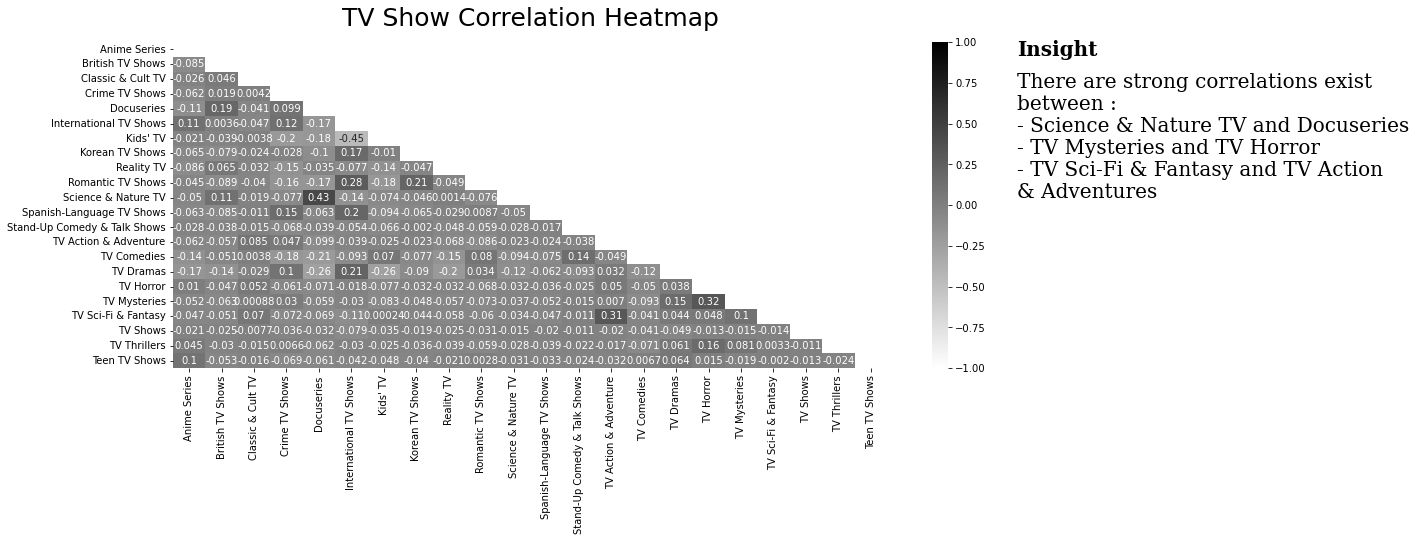

In [114]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_genre_tv.corr(), dtype=bool))
heatmap = sns.heatmap(df_genre_tv.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='gray_r')
heatmap.set_title('TV Show Correlation Heatmap', fontdict={'fontsize':25}, pad=16);

plt.text(26, 0.9, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(26, 12, '''
There are strong correlations exist 
between :
- Science & Nature TV and Docuseries
- TV Mysteries and TV Horror
- TV Sci-Fi & Fantasy and TV Action 
& Adventures
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">6. Average duration of a movie/tv show</h4>
  <p>
      <b>Datasets using- </b><mark>df_mv</mark>,<mark>df_tv</mark> <br>
        <b>Features using- </b><mark>duration</mark><br>
        <b>Chart type using - </b><mark>Histogram</mark><br> 
    </p>
</div>


In [115]:
duration_movie = df_mv['duration'].str.split(" ").str[0].astype(int)

In [116]:
print("The longest duration: {} min\nThe shortest duration: {} min".format(max(duration_movie),min(duration_movie)))

The longest duration: 312 min
The shortest duration: 3 min


In [117]:
df[df['duration'] == '312 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4253,s4254,Movie,Black Mirror: Bandersnatch,No Information,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,December


In [118]:
df[df['duration'] == '3 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Information,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019,June


<Figure size 1152x720 with 0 Axes>

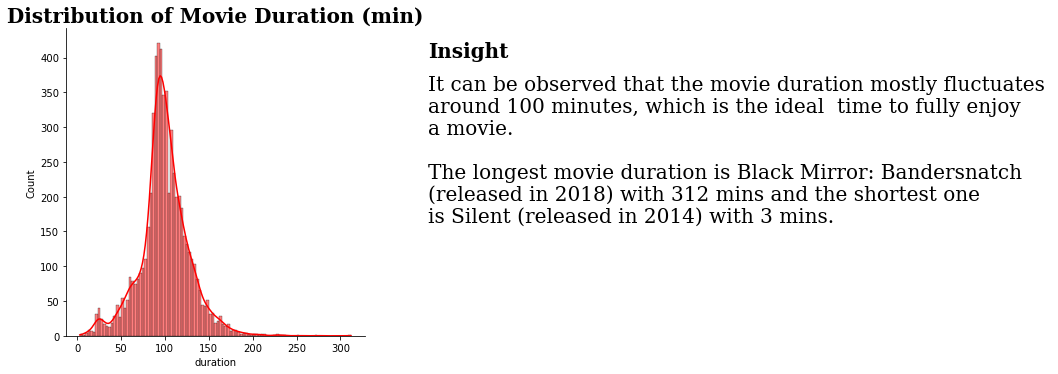

In [119]:
plt.figure(figsize=(16,10))
sns.displot(data = duration_movie,kde=True,color='r')
plt.title("Distribution of Movie Duration (min)",fontfamily='serif', fontsize=20,fontweight='bold',y=1)
plt.text(400, 400, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(400, 100, '''
It can be observed that the movie duration mostly fluctuates 
around 100 minutes, which is the ideal  time to fully enjoy 
a movie.

The longest movie duration is Black Mirror: Bandersnatch
(released in 2018) with 312 mins and the shortest one
is Silent (released in 2014) with 3 mins.

'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

In [120]:
s =dict(sorted(dict(Counter(df_tv['duration'])).items()))
df_season = pd.DataFrame.from_dict(s,orient ='index')
df_season.rename(columns = {0:'total'},inplace=True)
df_season = df_season.sort_values(by=['total'],ascending=False)

In [121]:
df[df['duration'] == '17 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
548,s549,TV Show,Grey's Anatomy,No Information,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021,July


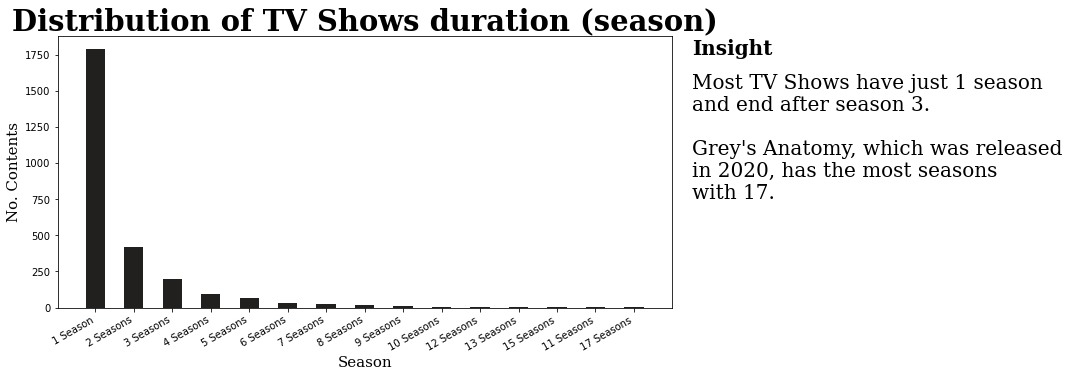

In [122]:
fig = plt.figure(figsize = (11, 5))
#data
x = df_season.index
y = df_season.total
# plot bar
plt.bar(x, y, color='#221f1f',width = 0.5)
#plt.legend(["Movie","TV Show"])
plt.xlabel("Season",fontfamily='serif',fontsize=15) 
plt.xticks(rotation=30, ha='right') #avoid text overlaping
plt.ylabel("No. Contents",fontfamily='serif',fontsize=15)

plt.title("Distribution of TV Shows duration (season)",fontfamily='serif', fontsize=29,fontweight='bold',y=1)
plt.text(15.5, 1750, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')
plt.text(15.5, 600, '''
Most TV Shows have just 1 season 
and end after season 3. 

Grey's Anatomy, which was released 
in 2020, has the most seasons 
with 17.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

## IV. Conclusion

<div class="alert alert-info" role="alert">
  <p>
- Movie is the most content type on Netflix<br>
- The country by the amount of the produces content is the United States<br>
- The popular streaming platform started gaining traction after 2016. Since then, the amount of content added has been increasing significantly<br>
- The largest count of Netflix content is made with a “TV-14” rating<br>
- International Movies/TV Show is a genre that is mostly in Netflix<br>
- The most popular movie duration on Netflix is 100 mins and the most common TV Show season is 1 season
</div>

## V. Reference

**[1]** Shivam Bansal, "Netflix Movies and TV Shows".[Online] Available: https://www.kaggle.com/datasets/shivamb/netflix-shows <br>
**[2]** Josh, "Netflix Data Visualization". [Online] Available: https://www.kaggle.com/code/joshuaswords/netflix-data-visualization <br>
**[3]** Kashish Rastogi, "Performing EDA of Netflix Dataset with Plotly". [Online] Available: https://www.analyticsvidhya.com/blog/2021/09/performing-eda-of-netflix-dataset-with-plotly/